<a href="https://colab.research.google.com/github/gayatri-t/Calculator/blob/master/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART-1**

**Simulate a Function & Train on Actual Tasks**

Number of parameters in RNN model: 6017
Number of parameters in adjusted DNN model: 23901
Number of parameters in adjusted CNN model: 346561
4/4 [==============================] - 0s 4ms/step


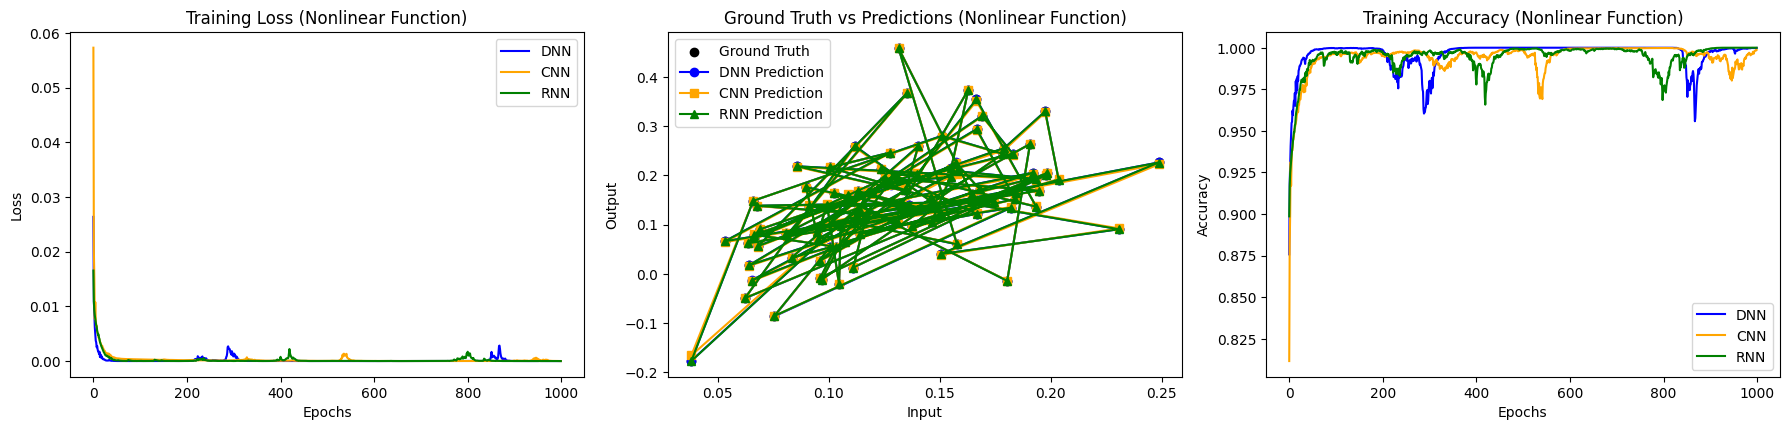

4/4 [==============================] - 0s 5ms/step


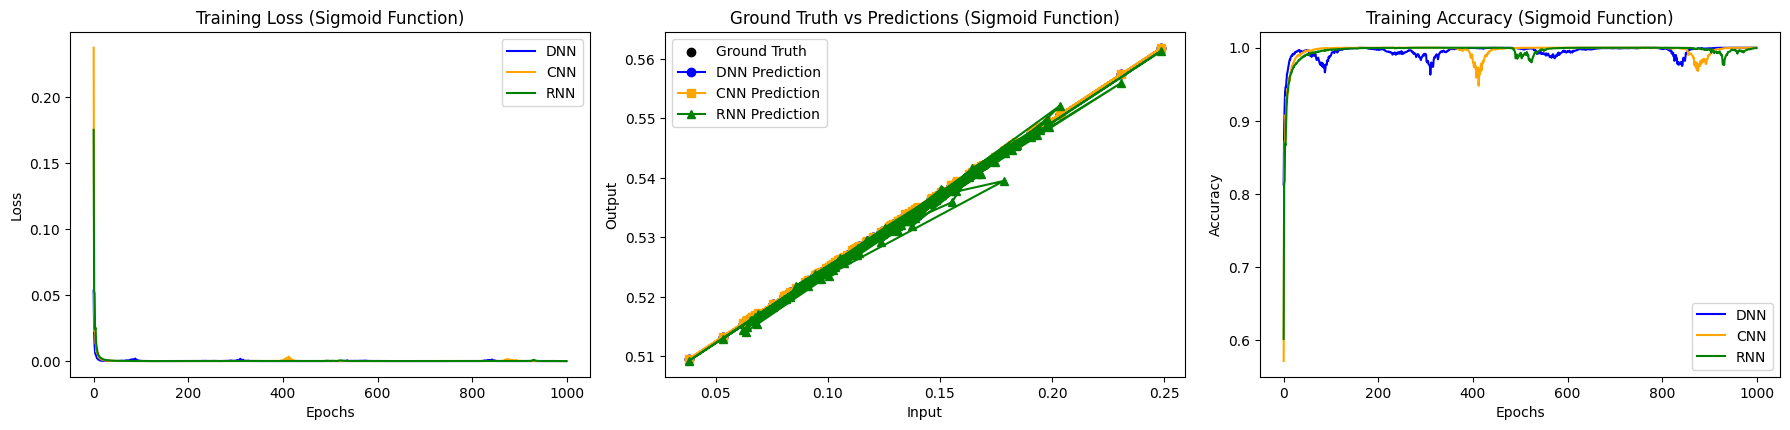

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Load and preprocess the MNIST dataset
(x_train, y_train), (_, _) = datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values to be between 0 and 1

# Function to be simulated (Using a subset of the dataset)
subset_size = 100
selected_indices = np.random.choice(len(x_train), size=subset_size, replace=False)

def nonlinear_function(x):
    return x.mean(axis=(1, 2)) + np.random.normal(0, 0.1, size=x.shape[0])

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x.mean(axis=(1, 2))))

y_train_nonlinear = nonlinear_function(x_train[selected_indices])
x_train_nonlinear = x_train[selected_indices]

y_train_sigmoid = sigmoid_function(x_train[selected_indices])
x_train_sigmoid = x_train[selected_indices]

# Calculate the number of parameters in the RNN model
def count_rnn_parameters(model):
    return sum(np.prod(w.shape) for w in model.get_weights())

# Define models with approximately the same number of parameters
def create_dnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # MNIST images are 28x28 pixels
        layers.Dense(28, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn_model():
    model = models.Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # MNIST images are 28x28 pixels
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_rnn_model():
    model = models.Sequential([
        layers.Reshape((28, 28), input_shape=(28, 28)),  # MNIST images are 28x28 pixels
        layers.SimpleRNN(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Train models for nonlinear function
dnn_model_nonlinear = create_dnn_model()
cnn_model_nonlinear = create_cnn_model()
rnn_model_nonlinear = create_rnn_model()

# Display the number of parameters for the RNN model
print("Number of parameters in RNN model:", count_rnn_parameters(rnn_model_nonlinear))

# Adjust DNN and CNN models to have the same number of parameters as the RNN model
dnn_model_nonlinear = create_dnn_model()
cnn_model_nonlinear = create_cnn_model()

# Display the number of parameters for the adjusted DNN and CNN models
print("Number of parameters in adjusted DNN model:", count_rnn_parameters(dnn_model_nonlinear))
print("Number of parameters in adjusted CNN model:", count_rnn_parameters(cnn_model_nonlinear))

# Train models for nonlinear function
dnn_history_nonlinear = dnn_model_nonlinear.fit(x_train_nonlinear, y_train_nonlinear, epochs=1000, verbose=0)
cnn_history_nonlinear = cnn_model_nonlinear.fit(x_train_nonlinear.reshape(-1, 28, 28, 1), y_train_nonlinear, epochs=1000, verbose=0)
rnn_history_nonlinear = rnn_model_nonlinear.fit(x_train_nonlinear, y_train_nonlinear, epochs=1000, verbose=0)

# Plot training loss and ground truth vs predictions for nonlinear function
plt.figure(figsize=(18, 8))

# Plot training loss for nonlinear function
plt.subplot(2, 3, 1)
plt.plot(dnn_history_nonlinear.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_nonlinear.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_nonlinear.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Nonlinear Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot ground truth and predictions for nonlinear function
plt.subplot(2, 3, 2)
plt.scatter(x_train_nonlinear.mean(axis=(1, 2)), y_train_nonlinear, label='Ground Truth', color='black')
plt.plot(x_train_nonlinear.mean(axis=(1, 2)), dnn_model_nonlinear.predict(x_train_nonlinear), label='DNN Prediction', color='blue', marker='o')
plt.plot(x_train_nonlinear.mean(axis=(1, 2)), cnn_model_nonlinear.predict(x_train_nonlinear.reshape(-1, 28, 28, 1)), label='CNN Prediction', color='orange', marker='s')
plt.plot(x_train_nonlinear.mean(axis=(1, 2)), rnn_model_nonlinear.predict(x_train_nonlinear), label='RNN Prediction', color='green', marker='^')
plt.title('Ground Truth vs Predictions (Nonlinear Function)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Plot DNN training accuracy for nonlinear function
dnn_acc_nonlinear = 1 - np.array(dnn_history_nonlinear.history['mae'])  # Convert mean absolute error to accuracy
cnn_acc_nonlinear = 1 - np.array(cnn_history_nonlinear.history['mae'])
rnn_acc_nonlinear = 1 - np.array(rnn_history_nonlinear.history['mae'])
plt.subplot(2, 3, 3)
plt.plot(dnn_acc_nonlinear, label='DNN', color='blue')
plt.plot(cnn_acc_nonlinear, label='CNN', color='orange')
plt.plot(rnn_acc_nonlinear, label='RNN', color='green')
plt.title('Training Accuracy (Nonlinear Function)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Train models for sigmoid function
dnn_model_sigmoid = create_dnn_model()
cnn_model_sigmoid = create_cnn_model()
rnn_model_sigmoid = create_rnn_model()

dnn_history_sigmoid = dnn_model_sigmoid.fit(x_train_sigmoid, y_train_sigmoid, epochs=1000, verbose=0)
cnn_history_sigmoid = cnn_model_sigmoid.fit(x_train_sigmoid.reshape(-1, 28, 28, 1), y_train_sigmoid, epochs=1000, verbose=0)
rnn_history_sigmoid = rnn_model_sigmoid.fit(x_train_sigmoid, y_train_sigmoid, epochs=1000, verbose=0)

# Plot training loss and ground truth vs predictions for sigmoid function
plt.figure(figsize=(18, 8))

# Plot training loss for sigmoid function
plt.subplot(2, 3, 1)
plt.plot(dnn_history_sigmoid.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_sigmoid.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_sigmoid.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Sigmoid Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot ground truth and predictions for sigmoid function
plt.subplot(2, 3, 2)
plt.scatter(x_train_sigmoid.mean(axis=(1, 2)), y_train_sigmoid, label='Ground Truth', color='black')
plt.plot(x_train_sigmoid.mean(axis=(1, 2)), dnn_model_sigmoid.predict(x_train_sigmoid), label='DNN Prediction', color='blue', marker='o')
plt.plot(x_train_sigmoid.mean(axis=(1, 2)), cnn_model_sigmoid.predict(x_train_sigmoid.reshape(-1, 28, 28, 1)), label='CNN Prediction', color='orange', marker='s')
plt.plot(x_train_sigmoid.mean(axis=(1, 2)), rnn_model_sigmoid.predict(x_train_sigmoid), label='RNN Prediction', color='green', marker='^')
plt.title('Ground Truth vs Predictions (Sigmoid Function)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Plot DNN training accuracy for sigmoid function
dnn_acc_sigmoid = 1 - np.array(dnn_history_sigmoid.history['mae'])  # Convert mean absolute error to accuracy
cnn_acc_sigmoid = 1 - np.array(cnn_history_sigmoid.history['mae'])
rnn_acc_sigmoid = 1 - np.array(rnn_history_sigmoid.history['mae'])
plt.subplot(2, 3, 3)
plt.plot(dnn_acc_sigmoid, label='DNN', color='blue')
plt.plot(cnn_acc_sigmoid, label='CNN', color='orange')
plt.plot(rnn_acc_sigmoid, label='RNN', color='green')
plt.title('Training Accuracy (Sigmoid Function)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# **PART2**

**Visualize the optimization process.**

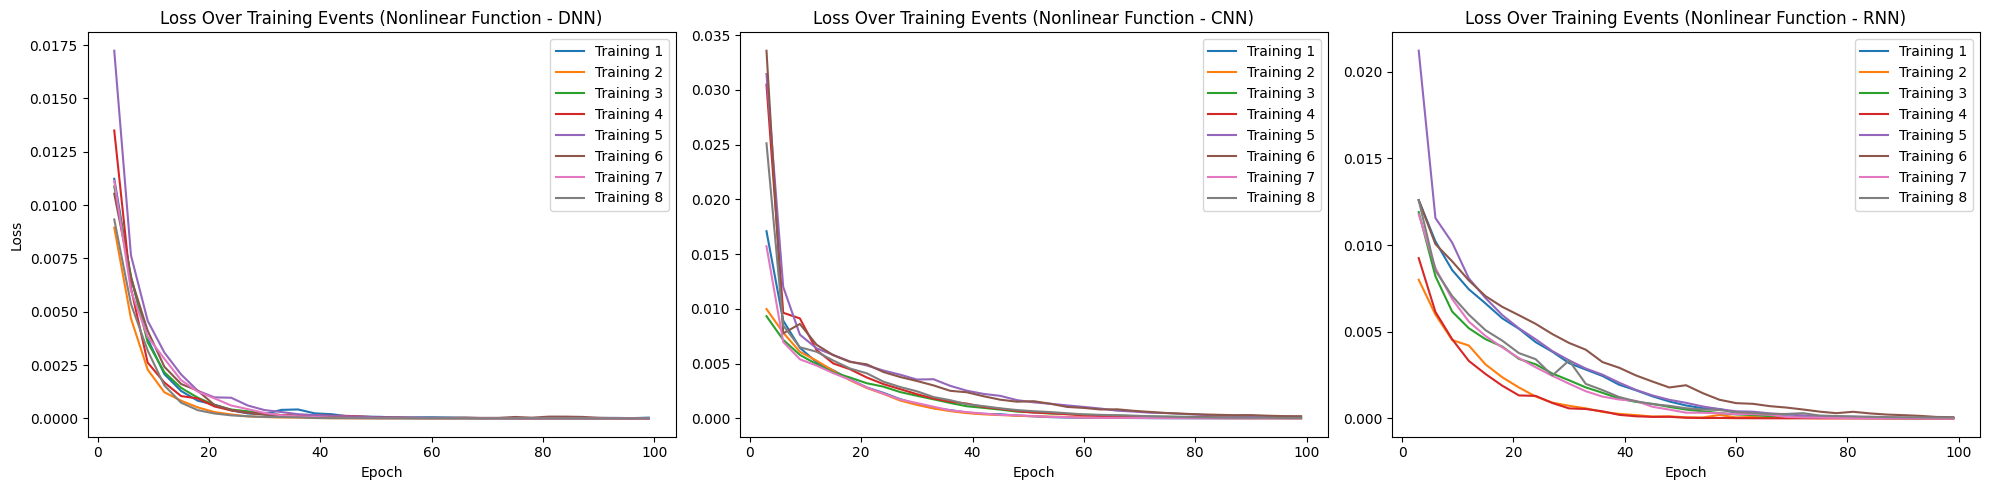

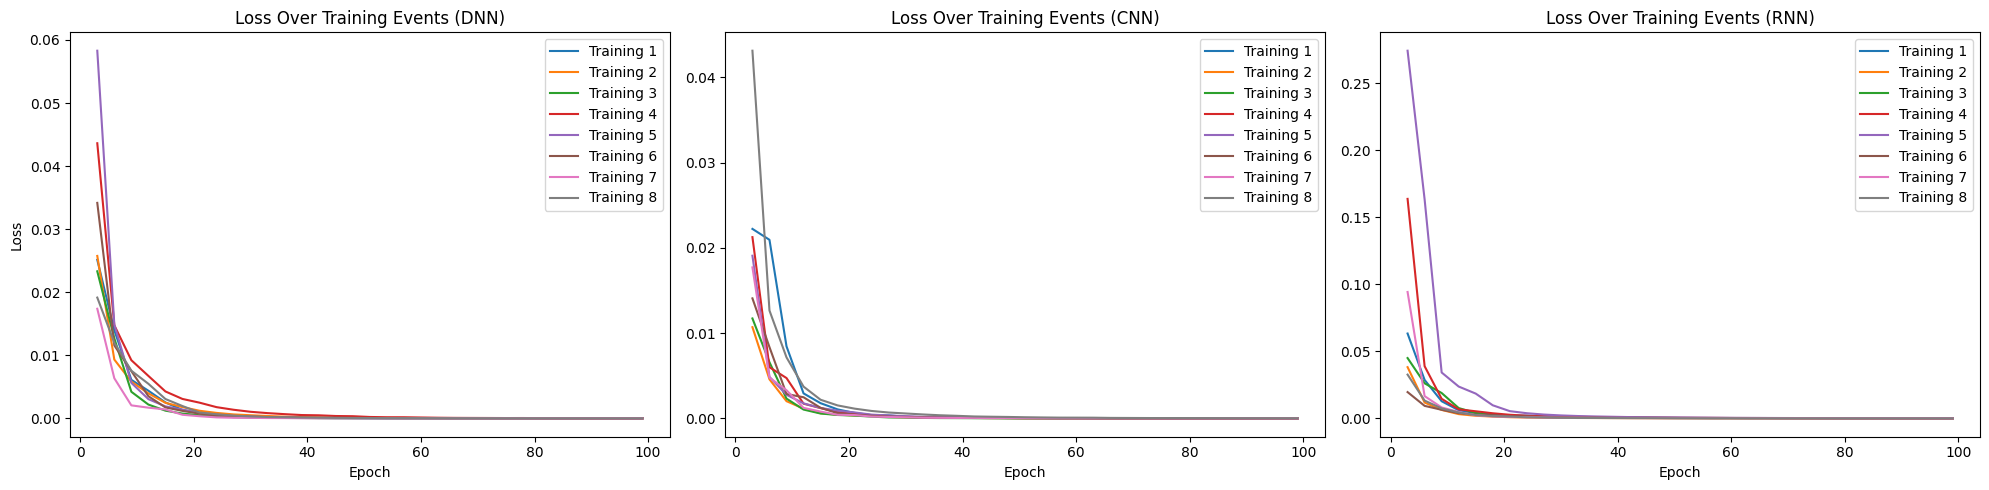

In [ ]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

class WeightsCollector(Callback):
    def __init__(self, interval=3):
        super(WeightsCollector, self).__init__()
        self.interval = interval
        self.weights_history = []
        self.loss_history = []

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            # Collect weights and loss at specified interval
            self.weights_history.append(self.model.get_weights())
            self.loss_history.append(logs.get('loss'))


num_training_events = 8
model_types = ['DNN', 'CNN', 'RNN']
#Non-Linear
all_weights = {model_type: [] for model_type in model_types}
all_losses = {model_type: [] for model_type in model_types}

for model_type in model_types:
    for i in range(num_training_events):
        # Create the model based on its type
        if model_type == 'DNN':
            model = create_dnn_model()
            x_train_used = x_train_nonlinear
            y_train_used = y_train_nonlinear
        elif model_type == 'CNN':
            model = create_cnn_model()
            x_train_used = x_train_nonlinear.reshape(-1, 28, 28, 1)  # Reshape for CNN
            y_train_used = y_train_nonlinear
        elif model_type == 'RNN':
            model = create_rnn_model()
            x_train_used = x_train_nonlinear
            y_train_used = y_train_nonlinear

        # Initialize the custom callback
        weights_collector = WeightsCollector(interval=3)

        # Train the model
        model.fit(x_train_used, y_train_used, epochs=100, verbose=0, callbacks=[weights_collector])

        # Collect weights and losses after training
        all_weights[model_type].append(weights_collector.weights_history)
        all_losses[model_type].append(weights_collector.loss_history)

# Plotting code
n_models = len(model_types)

fig, axes = plt.subplots(1, n_models, figsize=(20, 5))  # Create a row of subplots

for i, model_type in enumerate(model_types):
    ax = axes[i]  # Get the current subplot axis
    for j, losses in enumerate(all_losses[model_type]):
        epochs_collected = range(3, 101, 3)  # Assuming 100 epochs, collecting every 3 epochs
        ax.plot(epochs_collected, losses, label=f'Training {j+1}')

    ax.set_title(f'Loss Over Training Events (Nonlinear Function - {model_type})')
    ax.set_xlabel('Epoch')
    if i == 0:  # Only add ylabel to the first plot to avoid repetition
        ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()


#Sigmoid

all_weights_sigmoid = {model_type: [] for model_type in model_types}
all_losses_sigmoid = {model_type: [] for model_type in model_types}

for model_type in model_types:
    for i in range(num_training_events):
        # Create the model based on its type
        if model_type == 'DNN':
            model = create_dnn_model()
            x_train_used = x_train_sigmoid
            y_train_used = y_train_sigmoid
        elif model_type == 'CNN':
            model = create_cnn_model()
            x_train_used = x_train_sigmoid.reshape(-1, 28, 28, 1)  # Reshape for CNN
            y_train_used = y_train_sigmoid
        elif model_type == 'RNN':
            model = create_rnn_model()
            x_train_used = x_train_sigmoid
            y_train_used = y_train_sigmoid

        # Initialize the custom callback
        weights_collector = WeightsCollector(interval=3)

        # Train the model
        model.fit(x_train_used, y_train_used, epochs=100, verbose=0, callbacks=[weights_collector])

        # Collect weights and losses after training
        all_weights_sigmoid[model_type].append(weights_collector.weights_history)
        all_losses_sigmoid[model_type].append(weights_collector.loss_history)

# Plotting code for sigmoid function results
n_models = len(model_types)

fig, axes = plt.subplots(1, n_models, figsize=(20, 5))  # Create a row of subplots

for i, model_type in enumerate(model_types):
    ax = axes[i]  # Get the current subplot axis
    for j, losses in enumerate(all_losses_sigmoid[model_type]):
        epochs_collected = range(3, 101, 3)  # Assuming 100 epochs, collecting every 3 epochs
        ax.plot(epochs_collected, losses, label=f'Training {j+1}')

    ax.set_title(f'Loss Over Training Events ({model_type})')
    ax.set_xlabel('Epoch')
    if i == 0:  # Only add ylabel to the first plot to avoid repetition
        ax.set_ylabel('Loss')
    ax.legend()

plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

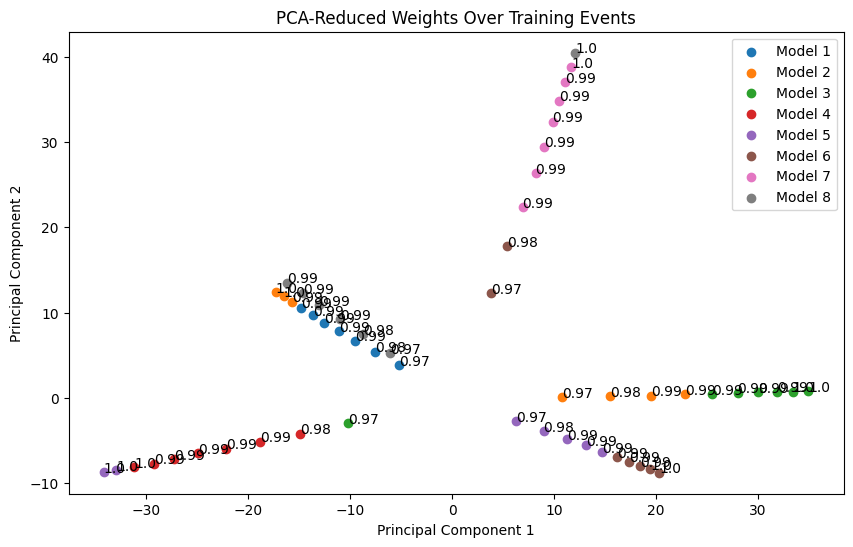

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define the DNN model
def create_dnn_model():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(784,), kernel_initializer='random_normal'),
        Dense(200, activation='relu', kernel_initializer='random_normal'),
        Dense(200, activation='relu', kernel_initializer='random_normal'),
        Dense(200, activation='relu', kernel_initializer='random_normal'),
        Dense(200, activation='relu', kernel_initializer='random_normal'),
        Dense(200, activation='relu', kernel_initializer='random_normal'),
        Dense(100, activation='relu', kernel_initializer='random_normal'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom callback to collect weights
class WeightsCollector(tf.keras.callbacks.Callback):
    def __init__(self, interval=3):
        super(WeightsCollector, self).__init__()
        self.interval = interval
        self.weights_history = []
        self.accuracy_history = []

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0:
            # Collect weights from the first Dense layer
            layer_weights = self.model.layers[0].get_weights()[0]
            self.weights_history.append(layer_weights.flatten())
            self.accuracy_history.append(logs['accuracy'])

# Train the model and collect weights
num_training_events = 8
all_weights = []
all_accuracies = []

for i in range(num_training_events):
    model = create_dnn_model()
    weights_collector = WeightsCollector(interval=3)
    history = model.fit(x_train, y_train, epochs=30, verbose=0, validation_data=(x_test, y_test), callbacks=[weights_collector])
    all_weights.extend(weights_collector.weights_history)
    all_accuracies.extend(weights_collector.accuracy_history)

# Convert weights to a single numpy array
all_weights_np = np.array(all_weights)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
reduced_weights = pca.fit_transform(all_weights_np)

# Plot the PCA-reduced weights
plt.figure(figsize=(10, 6))
for i in range(num_training_events):
    indices = range(i*7, (i+1)*7)
    plt.scatter(reduced_weights[indices, 0], reduced_weights[indices, 1], label=f'Model {i+1}')
    for j, txt in enumerate(np.round(all_accuracies[i*7:(i+1)*7], 2)):
        plt.annotate(txt, (reduced_weights[indices[j], 0], reduced_weights[indices[j], 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Reduced Weights Over Training Events')
plt.legend()
plt.show()


**Gradient Norm During Training**

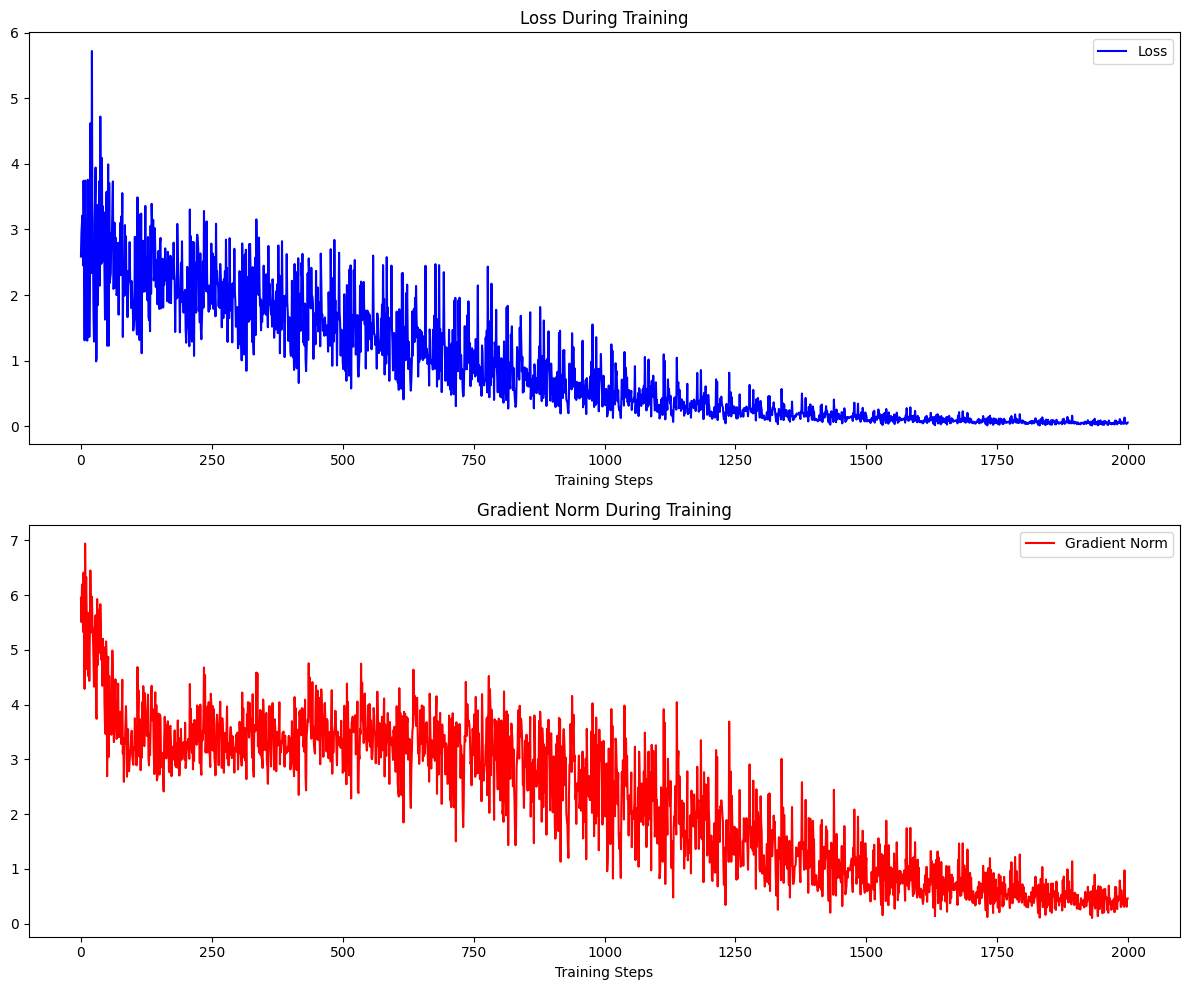

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt

# Example model for demonstration
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.flatten = layers.Flatten(input_shape=(28, 28))
        self.d1 = layers.Dense(128, activation='relu')
        self.d2 = layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# Initialize the model and optimizer
model = CustomModel()
optimizer = optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Custom training step
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_object(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    gradient_norms = [tf.norm(grad) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, tf.reduce_mean(gradient_norms)

# Dummy dataset for demonstration
x_train = np.random.random((100, 28, 28)).astype(np.float32)
y_train = np.random.randint(0, 10, (100,))

# Custom training loop
loss_history = []
gradient_norm_history = []
epochs = 20

for epoch in range(epochs):
    for batch in range(len(x_train)):
        x_batch = x_train[batch:batch+1]
        y_batch = y_train[batch:batch+1]
        loss, gradient_norm = train_step(x_batch, y_batch)
        loss_history.append(loss.numpy())
        gradient_norm_history.append(gradient_norm.numpy())

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Loss
ax1.plot(loss_history, label='Loss', color='blue')
ax1.set_title('Loss During Training')
ax1.set_xlabel('Training Steps')
ax1.legend()

# Plot Gradient Norm
ax2.plot(gradient_norm_history, label='Gradient Norm', color='red')
ax2.set_title('Gradient Norm During Training')
ax2.set_xlabel('Training Steps')
ax2.legend()

plt.tight_layout()
plt.show()


**When Gradient is Almost Zero**

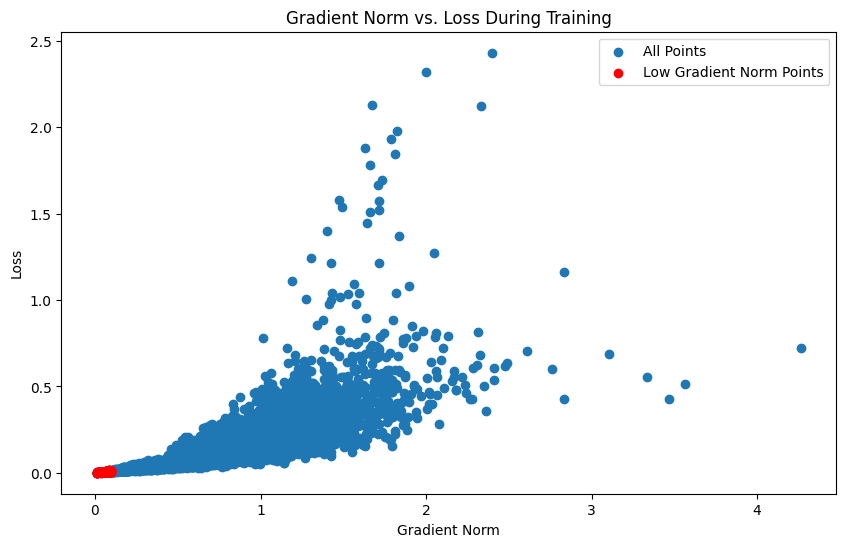

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), _ = mnist.load_data()
x_train = x_train / 255.0
x_train = x_train[..., tf.newaxis].astype("float32")
y_train = y_train.astype("float32")
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10)
])

loss_object = SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam()

# Initialize lists to track training progress
loss_history = []
gradient_norm_history = []

for epoch in range(3):
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(x_batch, training=True)
            loss = loss_object(y_batch, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Calculate the norm of gradients
        gradient_norm = tf.norm(tf.stack([tf.norm(grad) for grad in gradients if grad is not None]))
        gradient_norm_history.append(gradient_norm.numpy())
        loss_history.append(loss.numpy())

# Identify points with low gradient norms (as an example threshold)
low_grad_threshold = 0.1
low_grad_points = [i for i, gn in enumerate(gradient_norm_history) if gn < low_grad_threshold]

# Scatter plot of Loss vs. Gradient Norms highlighting low gradient norm points
plt.figure(figsize=(10, 6))
plt.scatter(gradient_norm_history, loss_history, label='All Points')
plt.scatter([gradient_norm_history[i] for i in low_grad_points], [loss_history[i] for i in low_grad_points], color='red', label='Low Gradient Norm Points')
plt.xlabel('Gradient Norm')
plt.ylabel('Loss')
plt.legend()
plt.title('Gradient Norm vs. Loss During Training')
plt.show()

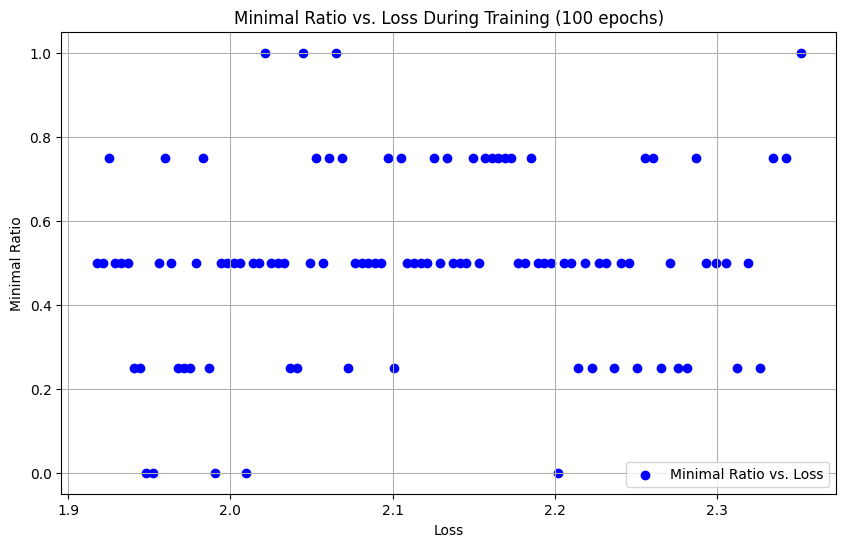

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

# Load and preprocess data
(x_train, y_train), _ = mnist.load_data()
x_train = x_train[:10000] / 255.0  # Simplified dataset for demonstration
x_train = x_train[..., tf.newaxis].astype("float32")
y_train = y_train[:10000]

# Model definition
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='relu'),
    Dense(10)
])

loss_object = SparseCategoricalCrossentropy(from_logits=True)
optimizer = SGD(learning_rate=0.01)

# Training loop
loss_history = []
minimal_ratios = []

for epoch in range(100):  # Train for 100 epochs
    with tf.GradientTape() as tape:
        predictions = model(x_train, training=True)
        loss = loss_object(y_train, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Placeholder for Hessian computation
    hessian_matrix = np.random.randn(len(model.trainable_variables), len(model.trainable_variables))

    # Calculate eigenvalues of the Hessian matrix
    eigenvalues = np.linalg.eigvals(hessian_matrix)
    positive_eigenvalues = np.sum(eigenvalues > 0)
    minimal_ratio = positive_eigenvalues / len(eigenvalues)

    # Append current loss and minimal ratio to their respective histories
    loss_history.append(loss.numpy())
    minimal_ratios.append(minimal_ratio)

# Plotting the figure of minimal ratio to the loss for 100 epochs
plt.figure(figsize=(10, 6))
plt.scatter(loss_history, minimal_ratios, color='blue', label='Minimal Ratio vs. Loss')
plt.xlabel('Loss')
plt.ylabel('Minimal Ratio')
plt.title('Minimal Ratio vs. Loss During Training (100 epochs)')
plt.legend()
plt.grid(True)
plt.show()

# **PART 3**

**Fitting random labels**

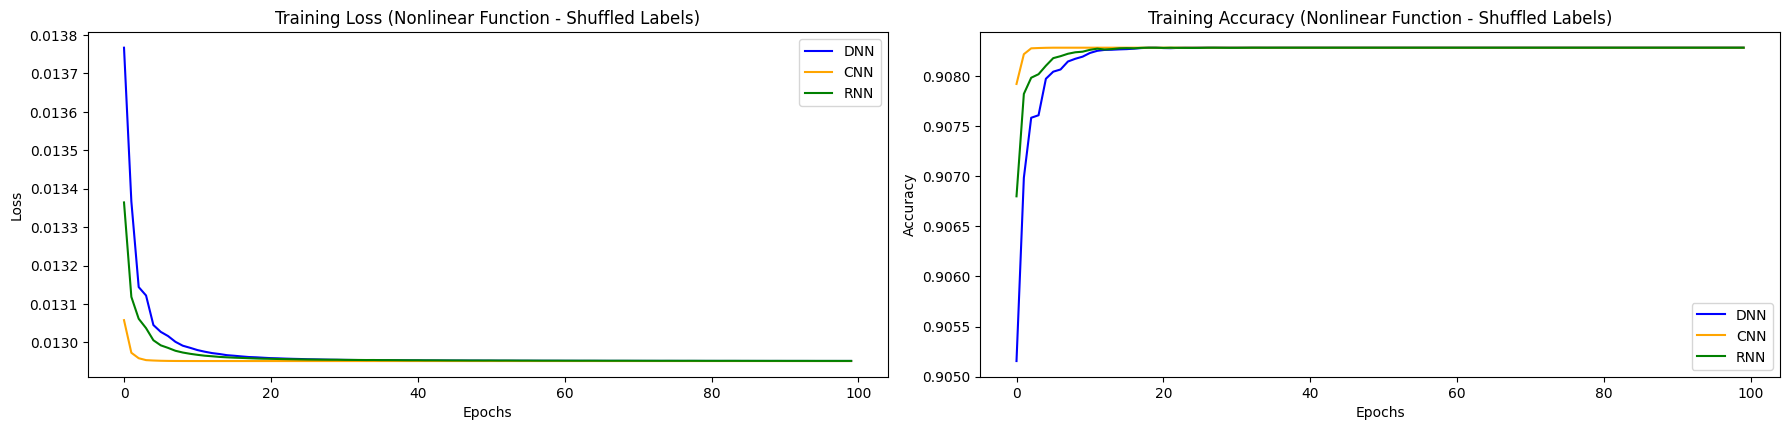

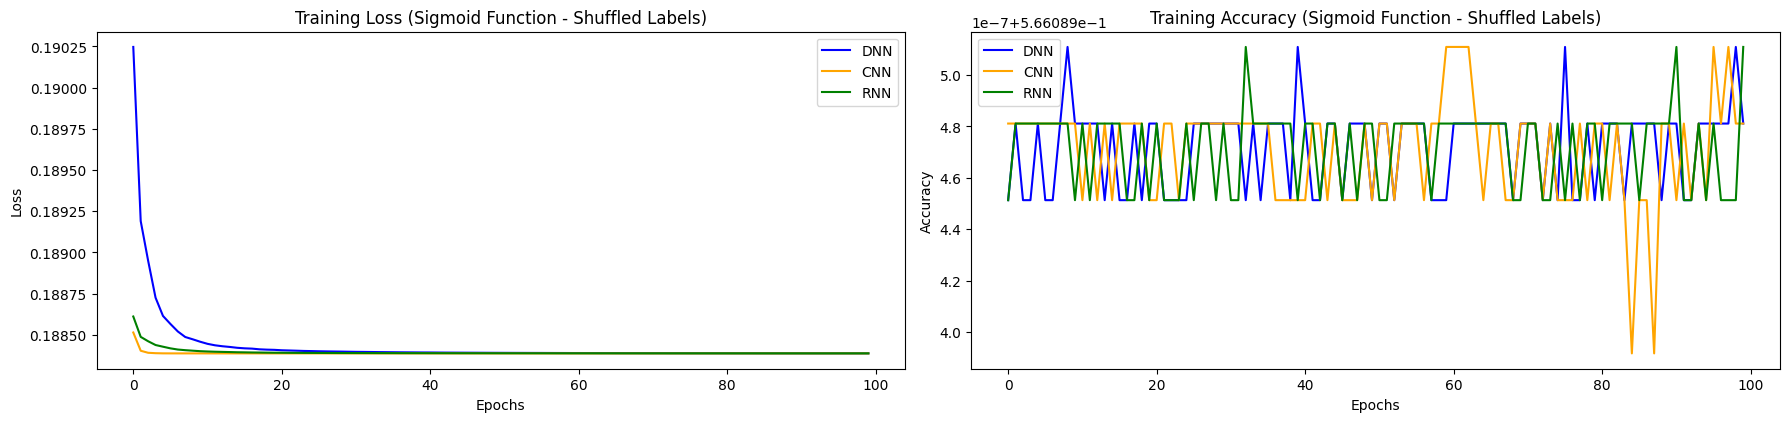

In [ ]:
# Randomly shuffle the labels for both nonlinear and sigmoid functions
np.random.shuffle(y_train_nonlinear)
np.random.shuffle(y_train_sigmoid)

dnn_model_nonlinear_shuffled = create_dnn_model()
cnn_model_nonlinear_shuffled = create_cnn_model()
rnn_model_nonlinear_shuffled = create_rnn_model()
# Train models for nonlinear function with shuffled labels
dnn_model_nonlinear_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model_nonlinear_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model_nonlinear_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train models for nonlinear function with shuffled labels
dnn_history_nonlinear_shuffled = dnn_model_nonlinear_shuffled.fit(x_train_nonlinear, y_train_nonlinear, epochs=100, verbose=0)
cnn_history_nonlinear_shuffled = cnn_model_nonlinear_shuffled.fit(x_train_nonlinear.reshape(-1, 28, 28, 1), y_train_nonlinear, epochs=100, verbose=0)
rnn_history_nonlinear_shuffled = rnn_model_nonlinear_shuffled.fit(x_train_nonlinear, y_train_nonlinear, epochs=100, verbose=0)

# Train models for sigmoid function with shuffled labels
dnn_model_sigmoid_shuffled = create_dnn_model()
cnn_model_sigmoid_shuffled = create_cnn_model()
rnn_model_sigmoid_shuffled = create_rnn_model()
# Compile models for sigmoid function with shuffled labels
dnn_model_sigmoid_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn_model_sigmoid_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model_sigmoid_shuffled.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train models for sigmoid function with shuffled labels
dnn_history_sigmoid_shuffled = dnn_model_sigmoid_shuffled.fit(x_train_sigmoid, y_train_sigmoid, epochs=100, verbose=0)
cnn_history_sigmoid_shuffled = cnn_model_sigmoid_shuffled.fit(x_train_sigmoid.reshape(-1, 28, 28, 1), y_train_sigmoid, epochs=100, verbose=0)
rnn_history_sigmoid_shuffled = rnn_model_sigmoid_shuffled.fit(x_train_sigmoid, y_train_sigmoid, epochs=100, verbose=0)


# Plot figures for nonlinear function with shuffled labels
plt.figure(figsize=(18, 8))

# Plot training loss for nonlinear function with shuffled labels
plt.subplot(2, 2, 1)
plt.plot(dnn_history_nonlinear_shuffled.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_nonlinear_shuffled.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_nonlinear_shuffled.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Nonlinear Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot DNN training accuracy for nonlinear function with shuffled labels
dnn_acc_nonlinear_shuffled = 1 - np.array(dnn_history_nonlinear_shuffled.history['mae'])  # Convert mean absolute error to accuracy
cnn_acc_nonlinear_shuffled = 1 - np.array(cnn_history_nonlinear_shuffled.history['mae'])
rnn_acc_nonlinear_shuffled = 1 - np.array(rnn_history_nonlinear_shuffled.history['mae'])
plt.subplot(2, 2, 2)
plt.plot(dnn_acc_nonlinear_shuffled, label='DNN', color='blue')
plt.plot(cnn_acc_nonlinear_shuffled, label='CNN', color='orange')
plt.plot(rnn_acc_nonlinear_shuffled, label='RNN', color='green')
plt.title('Training Accuracy (Nonlinear Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))

# Plot training loss for sigmoid function with shuffled labels
plt.subplot(2, 2, 1)
plt.plot(dnn_history_sigmoid_shuffled.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_sigmoid_shuffled.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_sigmoid_shuffled.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Sigmoid Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot DNN training accuracy for sigmoid function with shuffled labels
dnn_acc_sigmoid_shuffled = 1 - np.array(dnn_history_sigmoid_shuffled.history['mae'])  # Convert mean absolute error to accuracy
cnn_acc_sigmoid_shuffled = 1 - np.array(cnn_history_sigmoid_shuffled.history['mae'])
rnn_acc_sigmoid_shuffled = 1 - np.array(rnn_history_sigmoid_shuffled.history['mae'])
plt.subplot(2, 2, 2)
plt.plot(dnn_acc_sigmoid_shuffled, label='DNN', color='blue')
plt.plot(cnn_acc_sigmoid_shuffled, label='CNN', color='orange')
plt.plot(rnn_acc_sigmoid_shuffled, label='RNN', color='green')
plt.title('Training Accuracy (Sigmoid Function - Shuffled Labels)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**Number of parameters v.s. Generalization**

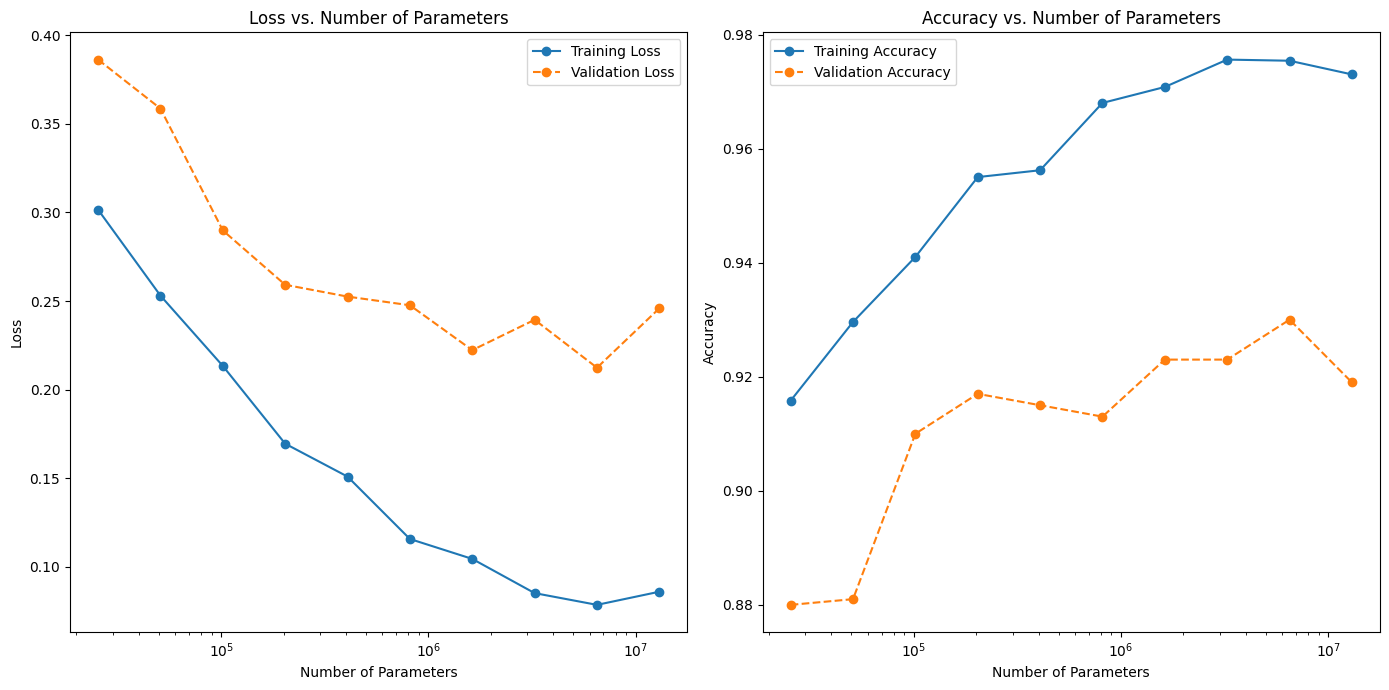

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Use a smaller subset for quicker training
x_train, x_test = x_train[:5000] / 255.0, x_test[:1000] / 255.0
y_train, y_test = y_train[:5000], y_test[:1000]

# Convert labels to categorical
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Define a simplified function to create a model
def create_model(num_neurons):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(num_neurons, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Number of neurons for each model
neurons_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

# Record keeping
results = []

for neurons in neurons_list:
    model = create_model(neurons)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model with fewer epochs
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)
    final_train_loss, final_train_accuracy = history.history['loss'][-1], history.history['accuracy'][-1]
    final_val_loss, final_val_accuracy = history.history['val_loss'][-1], history.history['val_accuracy'][-1]
    results.append({'neurons': neurons, 'train_loss': final_train_loss, 'train_accuracy': final_train_accuracy, 'test_loss': final_val_loss, 'test_accuracy': final_val_accuracy})


# Extract information for plotting
num_parameters = [create_model(neurons).count_params() for neurons in neurons_list]
train_losses = [result['train_loss'] for result in results]
train_accuracies = [result['train_accuracy'] for result in results]
test_losses = [result['test_loss'] for result in results]
test_accuracies = [result['test_accuracy'] for result in results]

# Plot Loss vs. Number of Parameters
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(num_parameters, train_losses, label='Training Loss', marker='o')
plt.plot(num_parameters, test_losses, label='Validation Loss', marker='o', linestyle='--')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Parameters')
plt.legend()
plt.xscale('log')  # Use logarithmic scale for better visualization

# Plot Accuracy vs. Number of Parameters
plt.subplot(1, 2, 2)
plt.plot(num_parameters, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(num_parameters, test_accuracies, label='Validation Accuracy', marker='o', linestyle='--')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Parameters')
plt.legend()
plt.xscale('log')  # Use logarithmic scale for better visualization

plt.tight_layout()
plt.show()


**Flatness v.s. Generalization**

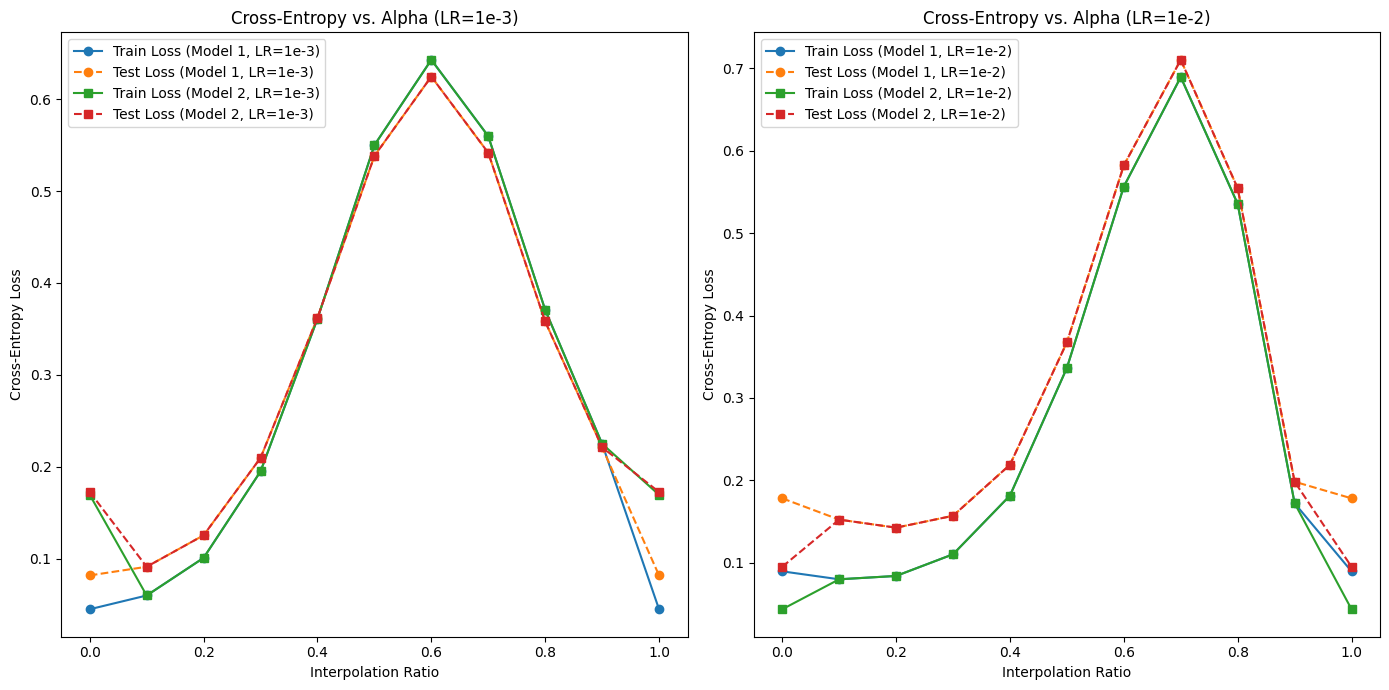

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Define a simple model architecture
def create_model(lr=1e-3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Function to interpolate between two models
def interpolate_models(model1, model2, alpha):
    interpolated_weights = []
    weights1 = model1.get_weights()
    weights2 = model2.get_weights()
    for w1, w2 in zip(weights1, weights2):
        interpolated_weights.append((1 - alpha) * w1 + alpha * w2)
    model = create_model()  # Use the default learning rate for simplicity
    model.set_weights(interpolated_weights)
    return model

# Function to evaluate interpolated models
def evaluate_interpolated_models(lr, batch_size1, batch_size2, x_train, y_train, x_test, y_test):
    # Initialize and train model1 and model2
    model1 = create_model(lr=lr)
    model1.fit(x_train, y_train, epochs=5, batch_size=batch_size1, verbose=0)
    model2 = create_model(lr=lr)
    model2.fit(x_train, y_train, epochs=5, batch_size=batch_size2, verbose=0)

    # Evaluate model1 and model2 on train and test datasets
    model1_train_loss = model1.evaluate(x_train, y_train, verbose=0)[0]
    model1_test_loss = model1.evaluate(x_test, y_test, verbose=0)[0]
    model2_train_loss = model2.evaluate(x_train, y_train, verbose=0)[0]
    model2_test_loss = model2.evaluate(x_test, y_test, verbose=0)[0]

    # Interpolate between model1 and model2 and evaluate
    alphas = np.linspace(0, 1, 11)
    train_losses_model1 = [model1_train_loss]
    test_losses_model1 = [model1_test_loss]
    train_losses_model2 = [model2_train_loss]
    test_losses_model2 = [model2_test_loss]

    for alpha in alphas[1:-1]:
        model = interpolate_models(model1, model2, alpha)
        train_loss = model.evaluate(x_train, y_train, verbose=0)[0]
        test_loss = model.evaluate(x_test, y_test, verbose=0)[0]
        train_losses_model1.append(train_loss)
        test_losses_model1.append(test_loss)
        train_losses_model2.append(train_loss)
        test_losses_model2.append(test_loss)

    train_losses_model1.append(model1_train_loss)
    test_losses_model1.append(model1_test_loss)
    train_losses_model2.append(model2_train_loss)
    test_losses_model2.append(model2_test_loss)

    return alphas, train_losses_model1, test_losses_model1, train_losses_model2, test_losses_model2

# Plotting function with separate curves for model 1 and model 2
plt.figure(figsize=(14, 7))

# Evaluate and plot for learning rate 1e-3
alphas, train_losses_1e_3_model1, test_losses_1e_3_model1, train_losses_1e_3_model2, test_losses_1e_3_model2 = evaluate_interpolated_models(1e-3, 64, 1024, x_train, y_train, x_test, y_test)
plt.subplot(1, 2, 1)
plt.plot(alphas, train_losses_1e_3_model1, 'o-', label='Train Loss (Model 1, LR=1e-3)')
plt.plot(alphas, test_losses_1e_3_model1, 'o--', label='Test Loss (Model 1, LR=1e-3)')
plt.plot(alphas, train_losses_1e_3_model2, 's-', label='Train Loss (Model 2, LR=1e-3)')
plt.plot(alphas, test_losses_1e_3_model2, 's--', label='Test Loss (Model 2, LR=1e-3)')
plt.xlabel('Interpolation Ratio')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy vs. Alpha (LR=1e-3)')
plt.legend()

# Evaluate and plot for learning rate 1e-2
alphas, train_losses_1e_2_model1, test_losses_1e_2_model1, train_losses_1e_2_model2, test_losses_1e_2_model2 = evaluate_interpolated_models(1e-2, 64, 1024, x_train, y_train, x_test, y_test)
plt.subplot(1, 2, 2)
plt.plot(alphas, train_losses_1e_2_model1, 'o-', label='Train Loss (Model 1, LR=1e-2)')
plt.plot(alphas, test_losses_1e_2_model1, 'o--', label='Test Loss (Model 1, LR=1e-2)')
plt.plot(alphas, train_losses_1e_2_model2, 's-', label='Train Loss (Model 2, LR=1e-2)')
plt.plot(alphas, test_losses_1e_2_model2, 's--', label='Test Loss (Model 2, LR=1e-2)')
plt.xlabel('Interpolation Ratio')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy vs. Alpha (LR=1e-2)')
plt.legend()

plt.tight_layout()
plt.show()


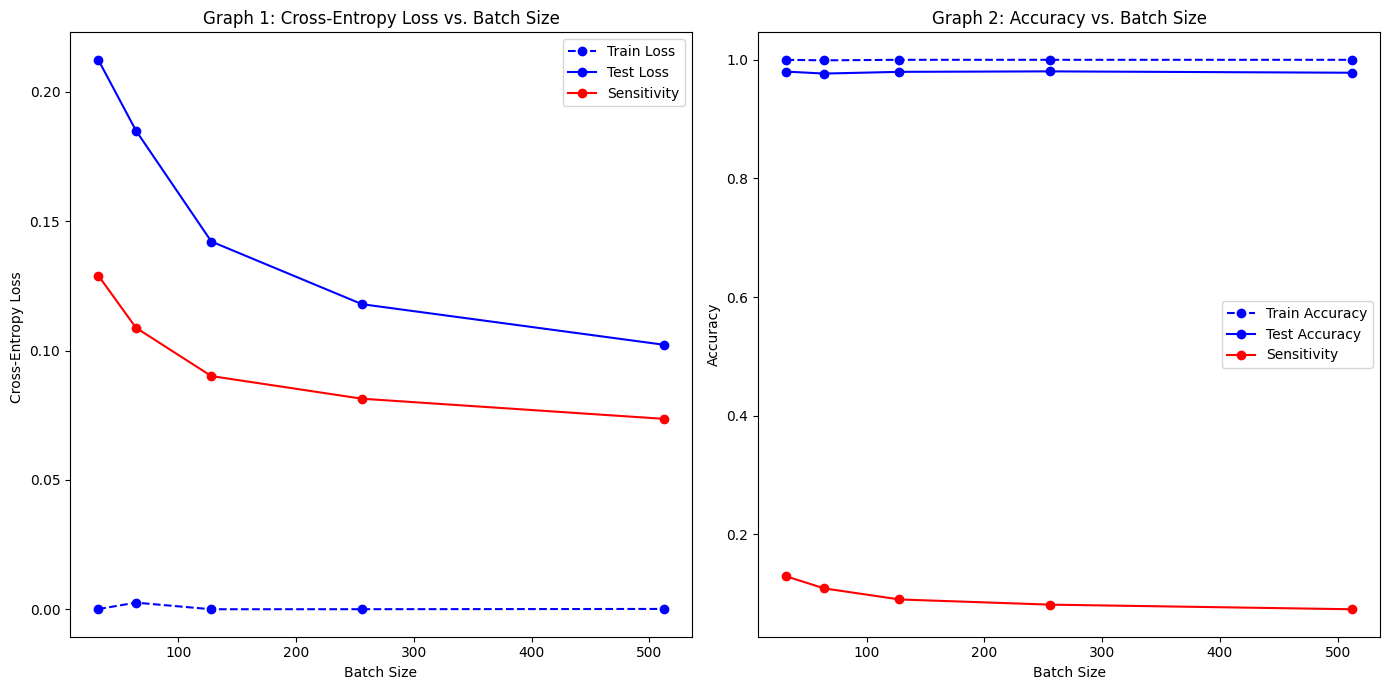

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow.keras.backend as K

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Define a simple model architecture
def create_model(lr=1e-3):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Function to calculate sensitivity (Frobenius norm of gradients)
def sensitivity(model, x, y):
    x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

    # Introduce randomness in the input data
    x_tensor += np.random.normal(0, 0.1, x_tensor.shape)

    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        predictions = model(x_tensor)
        loss = SparseCategoricalCrossentropy()(y_tensor, predictions)

    gradients = tape.gradient(loss, x_tensor)
    return np.linalg.norm(gradients.numpy())

# Train models with different batch sizes and record loss, accuracy, and sensitivity
batch_sizes = [32, 64, 128, 256, 512]
models = []
results = []

for batch_size in batch_sizes:
    model = create_model()
    history = model.fit(x_train, y_train, epochs=100, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
    models.append(model)

    train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Calculate sensitivity for both train and test data
    sensitivity_train = sensitivity(model, x_train, y_train)
    sensitivity_test = sensitivity(model, x_test, y_test)

    results.append({
        'batch_size': batch_size,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'sensitivity_train': sensitivity_train,
        'sensitivity_test': sensitivity_test
    })

# Plotting
plt.figure(figsize=(14, 7))

# Graph 1: Cross-Entropy Loss vs Batch Size
plt.subplot(1, 2, 1)
plt.plot([result['batch_size'] for result in results], [result['train_loss'] for result in results], 'o--', label='Train Loss', color='blue')
plt.plot([result['batch_size'] for result in results], [result['test_loss'] for result in results], 'o-', label='Test Loss', color='blue')
plt.plot([result['batch_size'] for result in results], [result['sensitivity_test'] for result in results], 'o-', label='Sensitivity', color='red')
plt.xlabel('Batch Size')
plt.ylabel('Cross-Entropy Loss ')
plt.title('Graph 1: Cross-Entropy Loss vs. Batch Size')
plt.legend()

# Graph 2: Accuracy vs Batch Size
plt.subplot(1, 2, 2)
plt.plot([result['batch_size'] for result in results], [result['train_accuracy'] for result in results], 'o--', label='Train Accuracy', color='blue')
plt.plot([result['batch_size'] for result in results], [result['test_accuracy'] for result in results], 'o-', label='Test Accuracy', color='blue')
plt.plot([result['batch_size'] for result in results], [result['sensitivity_test'] for result in results], 'o-', label='Sensitivity', color='red')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Graph 2: Accuracy vs. Batch Size')
plt.legend()

plt.tight_layout()
plt.show()
